In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import keras.optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from PIL import Image

import os
import numpy as np
import matplotlib.pyplot as plt

PATH = 'C:\\Users\\Daniel\\Documents\\GitHub\\flower-id\\nonResized'
#PATH = 'C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\nonResized'

Using TensorFlow backend.


In [6]:
train_dir = os.path.join(PATH, 'train')
#train_dir = os.path.join('C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\flowers', 'train')
validation_dir = os.path.join(PATH, 'validation')
#validation_dir = os.path.join('C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\flowers', 'validation')
print(train_dir)

C:\Users\Daniel\Documents\GitHub\flower-id\nonResized\train


In [7]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 200
IMG_WIDTH = 200

Training images: 2850
Validation images: 1473


In [13]:
total_train, total_val = 0, 0

for category in os.listdir(train_dir):
    total_train += len(os.listdir(os.path.join(train_dir, category)))
for category in os.listdir(validation_dir):
    total_val += len(os.listdir(os.path.join(validation_dir, category)))

print("Training images: " + str(total_train))
print("Validation images: " + str(total_val))


Training images: 2850
Validation images: 1473


In [15]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           horizontal_flip=True,
                                           zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

sample_training_images, _ = next(train_data_gen)

Found 2850 images belonging to 5 classes.
Found 1473 images belonging to 5 classes.


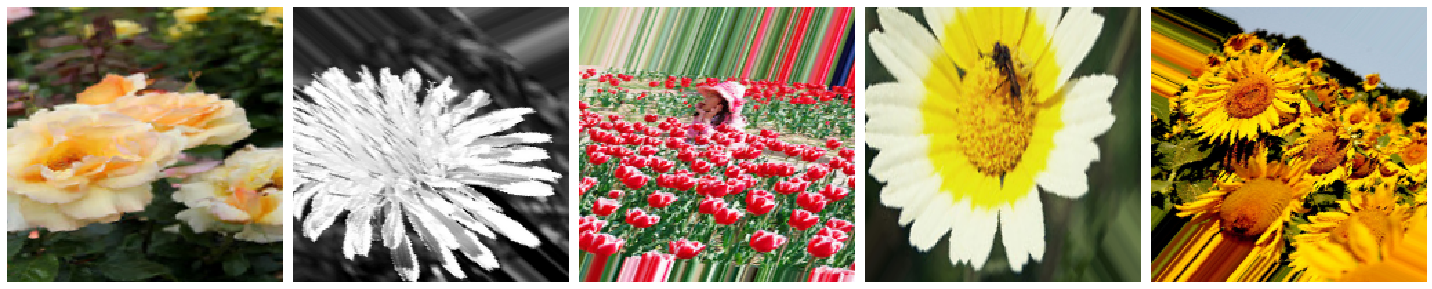

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(sample_training_images[:20])

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [18]:
opt = tf.keras.optimizers.SGD(lr=0.01)

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20


 1/22 [>.............................] - ETA: 2:29 - loss: 1.6254 - accuracy: 0.1406

 2/22 [=>............................] - ETA: 1:26 - loss: 1.6162 - accuracy: 0.1481

 3/22 [===>..........................] - ETA: 1:30 - loss: 1.6139 - accuracy: 0.1966

 4/22 [====>.........................] - ETA: 1:29 - loss: 1.6104 - accuracy: 0.2297

 5/22 [=====>........................] - ETA: 1:25 - loss: 1.6039 - accuracy: 0.2436

 6/22 [=======>......................] - ETA: 1:21 - loss: 1.6046 - accuracy: 0.2344

 7/22 [========>.....................] - ETA: 1:18 - loss: 1.6029 - accuracy: 0.2469

 8/22 [=========>....................] - ETA: 1:13 - loss: 1.6047 - accuracy: 0.2387

 9/22 [===========>..................] - ETA: 1:07 - loss: 1.6019 - accuracy: 0.2467

10/22 [============>.................] - ETA: 1:02 - loss: 1.6023 - accuracy: 0.2445

11/22 [==============>...............] - ETA: 57s - loss: 1.6040 - accuracy: 0.2382 

12/22 [===============>..............] - ETA: 52s - loss: 1.6026 - accuracy: 0.2406

13/22 [================>.............] - ETA: 46s - loss: 1.6005 - accuracy: 0.2478

14/22 [==================>...........] - ETA: 41s - loss: 1.5998 - accuracy: 0.2485

15/22 [===================>..........] - ETA: 35s - loss: 1.5999 - accuracy: 0.2475

16/22 [====================>.........] - ETA: 30s - loss: 1.5985 - accuracy: 0.2533

17/22 [======================>.......] - ETA: 25s - loss: 1.5965 - accuracy: 0.2603

18/22 [=======================>......] - ETA: 20s - loss: 1.5973 - accuracy: 0.2611

19/22 [========================>.....] - ETA: 14s - loss: 1.5977 - accuracy: 0.2596

20/22 [==========================>...] - ETA: 9s - loss: 1.5948 - accuracy: 0.2697 

21/22 [===========================>..] - ETA: 4s - loss: 1.5938 - accuracy: 0.2710

22/22 [==============================] - 124s 6s/step - loss: 1.5931 - accuracy: 0.2733 - val_loss: 1.5738 - val_accuracy: 0.3182


Epoch 2/20


 1/22 [>.............................] - ETA: 1:39 - loss: 1.5697 - accuracy: 0.3203

 2/22 [=>............................] - ETA: 1:43 - loss: 1.5775 - accuracy: 0.2930

 3/22 [===>..........................] - ETA: 1:38 - loss: 1.5735 - accuracy: 0.3073

 4/22 [====>.........................] - ETA: 1:32 - loss: 1.5734 - accuracy: 0.3125

 5/22 [=====>........................] - ETA: 1:27 - loss: 1.5740 - accuracy: 0.3047

 6/22 [=======>......................] - ETA: 1:21 - loss: 1.5704 - accuracy: 0.3008

 7/22 [========>.....................] - ETA: 1:15 - loss: 1.5674 - accuracy: 0.3114

 8/22 [=========>....................] - ETA: 1:11 - loss: 1.5658 - accuracy: 0.3164

 9/22 [===========>..................] - ETA: 1:05 - loss: 1.5630 - accuracy: 0.3194

10/22 [============>.................] - ETA: 1:00 - loss: 1.5639 - accuracy: 0.3164

11/22 [==============>...............] - ETA: 55s - loss: 1.5616 - accuracy: 0.3175 

12/22 [===============>..............] - ETA: 49s - loss: 1.5617 - accuracy: 0.3118

13/22 [================>.............] - ETA: 44s - loss: 1.5609 - accuracy: 0.3125

14/22 [==================>...........] - ETA: 39s - loss: 1.5592 - accuracy: 0.3175

15/22 [===================>..........] - ETA: 34s - loss: 1.5582 - accuracy: 0.3167

16/22 [====================>.........] - ETA: 27s - loss: 1.5618 - accuracy: 0.3153

17/22 [======================>.......] - ETA: 22s - loss: 1.5623 - accuracy: 0.3108

18/22 [=======================>......] - ETA: 18s - loss: 1.5621 - accuracy: 0.3086

19/22 [========================>.....] - ETA: 13s - loss: 1.5621 - accuracy: 0.3067

20/22 [==========================>...] - ETA: 9s - loss: 1.5596 - accuracy: 0.3094 

21/22 [===========================>..] - ETA: 4s - loss: 1.5592 - accuracy: 0.3092

22/22 [==============================] - 114s 5s/step - loss: 1.5575 - accuracy: 0.3130 - val_loss: 1.5458 - val_accuracy: 0.3118


Epoch 3/20


 1/22 [>.............................] - ETA: 1:24 - loss: 1.5377 - accuracy: 0.3281

 2/22 [=>............................] - ETA: 1:22 - loss: 1.5341 - accuracy: 0.3633

 3/22 [===>..........................] - ETA: 1:19 - loss: 1.5319 - accuracy: 0.3698

 4/22 [====>.........................] - ETA: 1:15 - loss: 1.5220 - accuracy: 0.3828

 5/22 [=====>........................] - ETA: 1:15 - loss: 1.5223 - accuracy: 0.3828

 6/22 [=======>......................] - ETA: 1:11 - loss: 1.5242 - accuracy: 0.3711

 7/22 [========>.....................] - ETA: 1:07 - loss: 1.5241 - accuracy: 0.3661

 8/22 [=========>....................] - ETA: 1:03 - loss: 1.5230 - accuracy: 0.3691

 9/22 [===========>..................] - ETA: 58s - loss: 1.5241 - accuracy: 0.3707 

10/22 [============>.................] - ETA: 53s - loss: 1.5210 - accuracy: 0.3734

11/22 [==============>...............] - ETA: 48s - loss: 1.5206 - accuracy: 0.3764

12/22 [===============>..............] - ETA: 44s - loss: 1.5249 - accuracy: 0.3665

13/22 [================>.............] - ETA: 39s - loss: 1.5252 - accuracy: 0.3684

14/22 [==================>...........] - ETA: 35s - loss: 1.5247 - accuracy: 0.3650

15/22 [===================>..........] - ETA: 29s - loss: 1.5259 - accuracy: 0.3625

16/22 [====================>.........] - ETA: 25s - loss: 1.5270 - accuracy: 0.3582

17/22 [======================>.......] - ETA: 20s - loss: 1.5230 - accuracy: 0.3641

18/22 [=======================>......] - ETA: 16s - loss: 1.5217 - accuracy: 0.3624

19/22 [========================>.....] - ETA: 12s - loss: 1.5188 - accuracy: 0.3627

20/22 [==========================>...] - ETA: 8s - loss: 1.5190 - accuracy: 0.3593 

21/22 [===========================>..] - ETA: 4s - loss: 1.5195 - accuracy: 0.3593

22/22 [==============================] - 104s 5s/step - loss: 1.5185 - accuracy: 0.3582 - val_loss: 1.4946 - val_accuracy: 0.3473


Epoch 4/20


 1/22 [>.............................] - ETA: 1:39 - loss: 1.5267 - accuracy: 0.3438

 2/22 [=>............................] - ETA: 1:29 - loss: 1.5055 - accuracy: 0.3125

 3/22 [===>..........................] - ETA: 1:24 - loss: 1.5008 - accuracy: 0.3281

 4/22 [====>.........................] - ETA: 1:19 - loss: 1.4999 - accuracy: 0.3301

 5/22 [=====>........................] - ETA: 1:14 - loss: 1.5045 - accuracy: 0.3141

 6/22 [=======>......................] - ETA: 1:10 - loss: 1.5038 - accuracy: 0.3021

 7/22 [========>.....................] - ETA: 1:05 - loss: 1.5025 - accuracy: 0.3125

 8/22 [=========>....................] - ETA: 1:01 - loss: 1.5026 - accuracy: 0.3125

 9/22 [===========>..................] - ETA: 56s - loss: 1.5030 - accuracy: 0.3142 

10/22 [============>.................] - ETA: 52s - loss: 1.4994 - accuracy: 0.3211

11/22 [==============>...............] - ETA: 48s - loss: 1.4994 - accuracy: 0.3232

12/22 [===============>..............] - ETA: 44s - loss: 1.5025 - accuracy: 0.3164

13/22 [================>.............] - ETA: 39s - loss: 1.4989 - accuracy: 0.3221

14/22 [==================>...........] - ETA: 35s - loss: 1.4975 - accuracy: 0.3225

15/22 [===================>..........] - ETA: 30s - loss: 1.4949 - accuracy: 0.3245

16/22 [====================>.........] - ETA: 26s - loss: 1.4954 - accuracy: 0.3252

17/22 [======================>.......] - ETA: 21s - loss: 1.4938 - accuracy: 0.3267

18/22 [=======================>......] - ETA: 17s - loss: 1.4927 - accuracy: 0.3281

19/22 [========================>.....] - ETA: 12s - loss: 1.4905 - accuracy: 0.3277

20/22 [==========================>...] - ETA: 8s - loss: 1.4872 - accuracy: 0.3328 

21/22 [===========================>..] - ETA: 4s - loss: 1.4876 - accuracy: 0.3326

22/22 [==============================] - 111s 5s/step - loss: 1.4894 - accuracy: 0.3321 - val_loss: 1.4476 - val_accuracy: 0.3615


Epoch 5/20


 1/22 [>.............................] - ETA: 1:23 - loss: 1.4426 - accuracy: 0.4375

 2/22 [=>............................] - ETA: 1:17 - loss: 1.4475 - accuracy: 0.3789

 3/22 [===>..........................] - ETA: 1:14 - loss: 1.4336 - accuracy: 0.3698

 4/22 [====>.........................] - ETA: 1:12 - loss: 1.4314 - accuracy: 0.3730

 5/22 [=====>........................] - ETA: 1:09 - loss: 1.4252 - accuracy: 0.3781

 6/22 [=======>......................] - ETA: 1:06 - loss: 1.4137 - accuracy: 0.3958

 7/22 [========>.....................] - ETA: 1:02 - loss: 1.4124 - accuracy: 0.4018

 8/22 [=========>....................] - ETA: 59s - loss: 1.4109 - accuracy: 0.3984 

 9/22 [===========>..................] - ETA: 50s - loss: 1.4089 - accuracy: 0.3998

10/22 [============>.................] - ETA: 47s - loss: 1.4441 - accuracy: 0.3904

11/22 [==============>...............] - ETA: 43s - loss: 1.4433 - accuracy: 0.3904

12/22 [===============>..............] - ETA: 39s - loss: 1.4431 - accuracy: 0.3911

13/22 [================>.............] - ETA: 36s - loss: 1.4385 - accuracy: 0.3943

14/22 [==================>...........] - ETA: 32s - loss: 1.4429 - accuracy: 0.3852

15/22 [===================>..........] - ETA: 28s - loss: 1.4389 - accuracy: 0.3866

16/22 [====================>.........] - ETA: 24s - loss: 1.4369 - accuracy: 0.3879

17/22 [======================>.......] - ETA: 20s - loss: 1.4356 - accuracy: 0.3852

18/22 [=======================>......] - ETA: 16s - loss: 1.4351 - accuracy: 0.3860

19/22 [========================>.....] - ETA: 12s - loss: 1.4339 - accuracy: 0.3905

20/22 [==========================>...] - ETA: 8s - loss: 1.4308 - accuracy: 0.3933 

21/22 [===========================>..] - ETA: 4s - loss: 1.4323 - accuracy: 0.3913

22/22 [==============================] - 104s 5s/step - loss: 1.4328 - accuracy: 0.3905 - val_loss: 1.4379 - val_accuracy: 0.3707


Epoch 6/20


 1/22 [>.............................] - ETA: 1:19 - loss: 1.4339 - accuracy: 0.3672

 2/22 [=>............................] - ETA: 1:15 - loss: 1.4157 - accuracy: 0.3984

 3/22 [===>..........................] - ETA: 1:12 - loss: 1.3992 - accuracy: 0.4089

 4/22 [====>.........................] - ETA: 1:08 - loss: 1.3999 - accuracy: 0.3984

 5/22 [=====>........................] - ETA: 1:06 - loss: 1.3938 - accuracy: 0.3922

 6/22 [=======>......................] - ETA: 1:03 - loss: 1.3901 - accuracy: 0.3958

 7/22 [========>.....................] - ETA: 1:00 - loss: 1.3894 - accuracy: 0.4018

 8/22 [=========>....................] - ETA: 57s - loss: 1.3872 - accuracy: 0.4033 

 9/22 [===========>..................] - ETA: 53s - loss: 1.3885 - accuracy: 0.4002

10/22 [============>.................] - ETA: 51s - loss: 1.3770 - accuracy: 0.4094

11/22 [==============>...............] - ETA: 47s - loss: 1.3721 - accuracy: 0.4112

12/22 [===============>..............] - ETA: 43s - loss: 1.3775 - accuracy: 0.4056

13/22 [================>.............] - ETA: 39s - loss: 1.3947 - accuracy: 0.4008

14/22 [==================>...........] - ETA: 35s - loss: 1.4012 - accuracy: 0.3929

15/22 [===================>..........] - ETA: 30s - loss: 1.4050 - accuracy: 0.3828

16/22 [====================>.........] - ETA: 26s - loss: 1.4023 - accuracy: 0.3853

17/22 [======================>.......] - ETA: 21s - loss: 1.4018 - accuracy: 0.3847

18/22 [=======================>......] - ETA: 17s - loss: 1.4035 - accuracy: 0.3824

19/22 [========================>.....] - ETA: 13s - loss: 1.4009 - accuracy: 0.3832

20/22 [==========================>...] - ETA: 8s - loss: 1.3978 - accuracy: 0.3852 

21/22 [===========================>..] - ETA: 4s - loss: 1.3969 - accuracy: 0.3839

22/22 [==============================] - 110s 5s/step - loss: 1.3934 - accuracy: 0.3881 - val_loss: 1.4008 - val_accuracy: 0.3977


Epoch 7/20


 1/22 [>.............................] - ETA: 22s - loss: 1.4369 - accuracy: 0.3235

 2/22 [=>............................] - ETA: 48s - loss: 1.3993 - accuracy: 0.3951

 3/22 [===>..........................] - ETA: 54s - loss: 1.3794 - accuracy: 0.3828

 4/22 [====>.........................] - ETA: 55s - loss: 1.4102 - accuracy: 0.3708

 5/22 [=====>........................] - ETA: 54s - loss: 1.3979 - accuracy: 0.3791

 6/22 [=======>......................] - ETA: 54s - loss: 1.3856 - accuracy: 0.3887

 7/22 [========>.....................] - ETA: 52s - loss: 1.3823 - accuracy: 0.3953

 8/22 [=========>....................] - ETA: 50s - loss: 1.3747 - accuracy: 0.3989

 9/22 [===========>..................] - ETA: 47s - loss: 1.3698 - accuracy: 0.4026

10/22 [============>.................] - ETA: 44s - loss: 1.3672 - accuracy: 0.4030

11/22 [==============>...............] - ETA: 42s - loss: 1.3732 - accuracy: 0.3904

12/22 [===============>..............] - ETA: 38s - loss: 1.3765 - accuracy: 0.3897

13/22 [================>.............] - ETA: 35s - loss: 1.3704 - accuracy: 0.3975

14/22 [==================>...........] - ETA: 31s - loss: 1.3682 - accuracy: 0.4034

15/22 [===================>..........] - ETA: 27s - loss: 1.3621 - accuracy: 0.4085

16/22 [====================>.........] - ETA: 23s - loss: 1.3571 - accuracy: 0.4140

17/22 [======================>.......] - ETA: 20s - loss: 1.3562 - accuracy: 0.4121

18/22 [=======================>......] - ETA: 16s - loss: 1.3619 - accuracy: 0.4095

19/22 [========================>.....] - ETA: 12s - loss: 1.3611 - accuracy: 0.4085

20/22 [==========================>...] - ETA: 8s - loss: 1.3589 - accuracy: 0.4075 

21/22 [===========================>..] - ETA: 4s - loss: 1.3602 - accuracy: 0.4059

22/22 [==============================] - 106s 5s/step - loss: 1.3551 - accuracy: 0.4082 - val_loss: 1.3223 - val_accuracy: 0.4148


Epoch 8/20


 1/22 [>.............................] - ETA: 1:23 - loss: 1.2930 - accuracy: 0.4766

 2/22 [=>............................] - ETA: 1:19 - loss: 1.2972 - accuracy: 0.4453

 3/22 [===>..........................] - ETA: 1:17 - loss: 1.3008 - accuracy: 0.4323

 4/22 [====>.........................] - ETA: 1:16 - loss: 1.3276 - accuracy: 0.4121

 5/22 [=====>........................] - ETA: 1:15 - loss: 1.3562 - accuracy: 0.4016

 6/22 [=======>......................] - ETA: 1:10 - loss: 1.3511 - accuracy: 0.4049

 7/22 [========>.....................] - ETA: 59s - loss: 1.3336 - accuracy: 0.4090 

 8/22 [=========>....................] - ETA: 58s - loss: 1.3350 - accuracy: 0.4075

 9/22 [===========>..................] - ETA: 55s - loss: 1.3421 - accuracy: 0.4074

10/22 [============>.................] - ETA: 51s - loss: 1.3610 - accuracy: 0.3988

11/22 [==============>...............] - ETA: 47s - loss: 1.3630 - accuracy: 0.3973

12/22 [===============>..............] - ETA: 44s - loss: 1.3570 - accuracy: 0.4008

13/22 [================>.............] - ETA: 40s - loss: 1.3532 - accuracy: 0.4038

14/22 [==================>...........] - ETA: 35s - loss: 1.3505 - accuracy: 0.4046

15/22 [===================>..........] - ETA: 31s - loss: 1.3542 - accuracy: 0.4036

16/22 [====================>.........] - ETA: 26s - loss: 1.3505 - accuracy: 0.4069

17/22 [======================>.......] - ETA: 22s - loss: 1.3467 - accuracy: 0.4092

18/22 [=======================>......] - ETA: 18s - loss: 1.3437 - accuracy: 0.4145

19/22 [========================>.....] - ETA: 13s - loss: 1.3459 - accuracy: 0.4135

20/22 [==========================>...] - ETA: 8s - loss: 1.3416 - accuracy: 0.4182 

21/22 [===========================>..] - ETA: 4s - loss: 1.3380 - accuracy: 0.4212

22/22 [==============================] - 112s 5s/step - loss: 1.3371 - accuracy: 0.4212 - val_loss: 1.3062 - val_accuracy: 0.4276


Epoch 9/20


 1/22 [>.............................] - ETA: 1:44 - loss: 1.3354 - accuracy: 0.3828

 2/22 [=>............................] - ETA: 1:33 - loss: 1.2972 - accuracy: 0.3984

 3/22 [===>..........................] - ETA: 1:23 - loss: 1.3024 - accuracy: 0.4089

 4/22 [====>.........................] - ETA: 1:16 - loss: 1.3368 - accuracy: 0.4043

 5/22 [=====>........................] - ETA: 1:10 - loss: 1.3320 - accuracy: 0.4031

 6/22 [=======>......................] - ETA: 1:05 - loss: 1.3134 - accuracy: 0.4180

 7/22 [========>.....................] - ETA: 1:00 - loss: 1.3070 - accuracy: 0.4308

 8/22 [=========>....................] - ETA: 57s - loss: 1.2909 - accuracy: 0.4424 

 9/22 [===========>..................] - ETA: 54s - loss: 1.2857 - accuracy: 0.4418

10/22 [============>.................] - ETA: 52s - loss: 1.2948 - accuracy: 0.4359

11/22 [==============>...............] - ETA: 49s - loss: 1.3208 - accuracy: 0.4276

12/22 [===============>..............] - ETA: 44s - loss: 1.3214 - accuracy: 0.4232

13/22 [================>.............] - ETA: 40s - loss: 1.3177 - accuracy: 0.4273

14/22 [==================>...........] - ETA: 35s - loss: 1.3080 - accuracy: 0.4308

15/22 [===================>..........] - ETA: 31s - loss: 1.3038 - accuracy: 0.4328

16/22 [====================>.........] - ETA: 26s - loss: 1.3027 - accuracy: 0.4321

17/22 [======================>.......] - ETA: 21s - loss: 1.2969 - accuracy: 0.4318

18/22 [=======================>......] - ETA: 17s - loss: 1.3041 - accuracy: 0.4267

19/22 [========================>.....] - ETA: 13s - loss: 1.3070 - accuracy: 0.4260

20/22 [==========================>...] - ETA: 8s - loss: 1.3003 - accuracy: 0.4335 

21/22 [===========================>..] - ETA: 4s - loss: 1.2972 - accuracy: 0.4356

22/22 [==============================] - 113s 5s/step - loss: 1.2981 - accuracy: 0.4364 - val_loss: 1.2668 - val_accuracy: 0.4354


Epoch 10/20


 1/22 [>.............................] - ETA: 1:19 - loss: 1.2314 - accuracy: 0.4531

 2/22 [=>............................] - ETA: 1:15 - loss: 1.2303 - accuracy: 0.4492

 3/22 [===>..........................] - ETA: 1:12 - loss: 1.2323 - accuracy: 0.4583

 4/22 [====>.........................] - ETA: 1:09 - loss: 1.2390 - accuracy: 0.4551

 5/22 [=====>........................] - ETA: 1:05 - loss: 1.2336 - accuracy: 0.4641

 6/22 [=======>......................] - ETA: 1:01 - loss: 1.2328 - accuracy: 0.4727

 7/22 [========>.....................] - ETA: 57s - loss: 1.2435 - accuracy: 0.4643 

 8/22 [=========>....................] - ETA: 53s - loss: 1.2532 - accuracy: 0.4619

 9/22 [===========>..................] - ETA: 51s - loss: 1.2375 - accuracy: 0.4679

10/22 [============>.................] - ETA: 49s - loss: 1.2380 - accuracy: 0.4672

11/22 [==============>...............] - ETA: 45s - loss: 1.2345 - accuracy: 0.4702

12/22 [===============>..............] - ETA: 41s - loss: 1.2394 - accuracy: 0.4668

13/22 [================>.............] - ETA: 35s - loss: 1.2435 - accuracy: 0.4650

14/22 [==================>...........] - ETA: 31s - loss: 1.2579 - accuracy: 0.4594

15/22 [===================>..........] - ETA: 28s - loss: 1.2538 - accuracy: 0.4628

16/22 [====================>.........] - ETA: 24s - loss: 1.2552 - accuracy: 0.4626

17/22 [======================>.......] - ETA: 20s - loss: 1.2498 - accuracy: 0.4645

18/22 [=======================>......] - ETA: 16s - loss: 1.2464 - accuracy: 0.4697

19/22 [========================>.....] - ETA: 12s - loss: 1.2425 - accuracy: 0.4709

20/22 [==========================>...] - ETA: 8s - loss: 1.2407 - accuracy: 0.4724 

21/22 [===========================>..] - ETA: 4s - loss: 1.2443 - accuracy: 0.4703

22/22 [==============================] - 107s 5s/step - loss: 1.2432 - accuracy: 0.4691 - val_loss: 1.2275 - val_accuracy: 0.4744


Epoch 11/20


 1/22 [>.............................] - ETA: 1:23 - loss: 1.2710 - accuracy: 0.4766

 2/22 [=>............................] - ETA: 1:19 - loss: 1.2427 - accuracy: 0.4570

 3/22 [===>..........................] - ETA: 1:15 - loss: 1.2133 - accuracy: 0.4688

 4/22 [====>.........................] - ETA: 1:10 - loss: 1.2522 - accuracy: 0.4492

 5/22 [=====>........................] - ETA: 1:06 - loss: 1.3251 - accuracy: 0.4297

 6/22 [=======>......................] - ETA: 1:02 - loss: 1.3042 - accuracy: 0.4518

 7/22 [========>.....................] - ETA: 58s - loss: 1.2954 - accuracy: 0.4587 

 8/22 [=========>....................] - ETA: 56s - loss: 1.2804 - accuracy: 0.4629

 9/22 [===========>..................] - ETA: 52s - loss: 1.2697 - accuracy: 0.4601

10/22 [============>.................] - ETA: 49s - loss: 1.2534 - accuracy: 0.4734

11/22 [==============>...............] - ETA: 45s - loss: 1.2462 - accuracy: 0.4702

12/22 [===============>..............] - ETA: 41s - loss: 1.2439 - accuracy: 0.4694

13/22 [================>.............] - ETA: 37s - loss: 1.2361 - accuracy: 0.4736

14/22 [==================>...........] - ETA: 33s - loss: 1.2327 - accuracy: 0.4743

15/22 [===================>..........] - ETA: 29s - loss: 1.2326 - accuracy: 0.4781

16/22 [====================>.........] - ETA: 25s - loss: 1.2257 - accuracy: 0.4800

17/22 [======================>.......] - ETA: 21s - loss: 1.2217 - accuracy: 0.4858

18/22 [=======================>......] - ETA: 16s - loss: 1.2195 - accuracy: 0.4883

19/22 [========================>.....] - ETA: 12s - loss: 1.2208 - accuracy: 0.4827

20/22 [==========================>...] - ETA: 8s - loss: 1.2238 - accuracy: 0.4812 

21/22 [===========================>..] - ETA: 4s - loss: 1.2325 - accuracy: 0.4781

22/22 [==============================] - 110s 5s/step - loss: 1.2268 - accuracy: 0.4798 - val_loss: 1.2167 - val_accuracy: 0.4787


Epoch 12/20


 1/22 [>.............................] - ETA: 23s - loss: 1.1540 - accuracy: 0.7059

 2/22 [=>............................] - ETA: 51s - loss: 1.1687 - accuracy: 0.5741

 3/22 [===>..........................] - ETA: 57s - loss: 1.1758 - accuracy: 0.5310

 4/22 [====>.........................] - ETA: 57s - loss: 1.2024 - accuracy: 0.5096

 5/22 [=====>........................] - ETA: 56s - loss: 1.1990 - accuracy: 0.5073

 6/22 [=======>......................] - ETA: 55s - loss: 1.1974 - accuracy: 0.5134

 7/22 [========>.....................] - ETA: 55s - loss: 1.1835 - accuracy: 0.5187

 8/22 [=========>....................] - ETA: 53s - loss: 1.1828 - accuracy: 0.5194

 9/22 [===========>..................] - ETA: 49s - loss: 1.1805 - accuracy: 0.5170

10/22 [============>.................] - ETA: 46s - loss: 1.1972 - accuracy: 0.5034

11/22 [==============>...............] - ETA: 43s - loss: 1.2066 - accuracy: 0.5046

12/22 [===============>..............] - ETA: 40s - loss: 1.2042 - accuracy: 0.5069

13/22 [================>.............] - ETA: 37s - loss: 1.2035 - accuracy: 0.5013

14/22 [==================>...........] - ETA: 34s - loss: 1.1998 - accuracy: 0.5071

15/22 [===================>..........] - ETA: 30s - loss: 1.1997 - accuracy: 0.5071

16/22 [====================>.........] - ETA: 26s - loss: 1.1939 - accuracy: 0.5123

17/22 [======================>.......] - ETA: 22s - loss: 1.1918 - accuracy: 0.5134

18/22 [=======================>......] - ETA: 18s - loss: 1.1838 - accuracy: 0.5145

19/22 [========================>.....] - ETA: 13s - loss: 1.1842 - accuracy: 0.5111

20/22 [==========================>...] - ETA: 9s - loss: 1.1846 - accuracy: 0.5109 

21/22 [===========================>..] - ETA: 4s - loss: 1.1824 - accuracy: 0.5120

22/22 [==============================] - 117s 5s/step - loss: 1.1765 - accuracy: 0.5132 - val_loss: 1.2126 - val_accuracy: 0.4751


Epoch 13/20


 1/22 [>.............................] - ETA: 1:25 - loss: 1.0965 - accuracy: 0.5234

 2/22 [=>............................] - ETA: 1:19 - loss: 1.1309 - accuracy: 0.5312

 3/22 [===>..........................] - ETA: 1:18 - loss: 1.1457 - accuracy: 0.5026

 4/22 [====>.........................] - ETA: 1:14 - loss: 1.1507 - accuracy: 0.4922

 5/22 [=====>........................] - ETA: 1:09 - loss: 1.1967 - accuracy: 0.4766

 6/22 [=======>......................] - ETA: 1:04 - loss: 1.1935 - accuracy: 0.4805

 7/22 [========>.....................] - ETA: 1:00 - loss: 1.2229 - accuracy: 0.4665

 8/22 [=========>....................] - ETA: 55s - loss: 1.2113 - accuracy: 0.4678 

 9/22 [===========>..................] - ETA: 51s - loss: 1.1980 - accuracy: 0.4809

10/22 [============>.................] - ETA: 47s - loss: 1.1928 - accuracy: 0.4859

11/22 [==============>...............] - ETA: 40s - loss: 1.2009 - accuracy: 0.4855

12/22 [===============>..............] - ETA: 37s - loss: 1.2023 - accuracy: 0.4882

13/22 [================>.............] - ETA: 34s - loss: 1.1906 - accuracy: 0.4930

14/22 [==================>...........] - ETA: 31s - loss: 1.1953 - accuracy: 0.4906

15/22 [===================>..........] - ETA: 28s - loss: 1.1875 - accuracy: 0.4934

16/22 [====================>.........] - ETA: 24s - loss: 1.1890 - accuracy: 0.4969

17/22 [======================>.......] - ETA: 20s - loss: 1.1825 - accuracy: 0.5000

18/22 [=======================>......] - ETA: 16s - loss: 1.1789 - accuracy: 0.5014

19/22 [========================>.....] - ETA: 12s - loss: 1.1752 - accuracy: 0.5056

20/22 [==========================>...] - ETA: 8s - loss: 1.1759 - accuracy: 0.5041 

21/22 [===========================>..] - ETA: 4s - loss: 1.1776 - accuracy: 0.5012

22/22 [==============================] - 108s 5s/step - loss: 1.1780 - accuracy: 0.5018 - val_loss: 1.1831 - val_accuracy: 0.4879


Epoch 14/20


 1/22 [>.............................] - ETA: 1:30 - loss: 1.0626 - accuracy: 0.5547

 2/22 [=>............................] - ETA: 1:25 - loss: 1.0767 - accuracy: 0.5430

 3/22 [===>..........................] - ETA: 1:18 - loss: 1.1121 - accuracy: 0.5339

 4/22 [====>.........................] - ETA: 1:12 - loss: 1.1054 - accuracy: 0.5430

 5/22 [=====>........................] - ETA: 1:07 - loss: 1.0970 - accuracy: 0.5453

 6/22 [=======>......................] - ETA: 1:03 - loss: 1.1031 - accuracy: 0.5430

 7/22 [========>.....................] - ETA: 59s - loss: 1.1111 - accuracy: 0.5469 

 8/22 [=========>....................] - ETA: 55s - loss: 1.1074 - accuracy: 0.5508

 9/22 [===========>..................] - ETA: 47s - loss: 1.0963 - accuracy: 0.5482

10/22 [============>.................] - ETA: 43s - loss: 1.1102 - accuracy: 0.5405

11/22 [==============>...............] - ETA: 40s - loss: 1.1188 - accuracy: 0.5381

12/22 [===============>..............] - ETA: 38s - loss: 1.1200 - accuracy: 0.5381

13/22 [================>.............] - ETA: 35s - loss: 1.1174 - accuracy: 0.5382

14/22 [==================>...........] - ETA: 32s - loss: 1.1215 - accuracy: 0.5336

15/22 [===================>..........] - ETA: 28s - loss: 1.1277 - accuracy: 0.5307

16/22 [====================>.........] - ETA: 24s - loss: 1.1293 - accuracy: 0.5317

17/22 [======================>.......] - ETA: 20s - loss: 1.1315 - accuracy: 0.5274

18/22 [=======================>......] - ETA: 16s - loss: 1.1292 - accuracy: 0.5281

19/22 [========================>.....] - ETA: 12s - loss: 1.1284 - accuracy: 0.5287

20/22 [==========================>...] - ETA: 8s - loss: 1.1274 - accuracy: 0.5288 

21/22 [===========================>..] - ETA: 4s - loss: 1.1259 - accuracy: 0.5316

22/22 [==============================] - 111s 5s/step - loss: 1.1253 - accuracy: 0.5353 - val_loss: 1.1682 - val_accuracy: 0.5021


Epoch 15/20


 1/22 [>.............................] - ETA: 1:26 - loss: 1.0869 - accuracy: 0.5234

 2/22 [=>............................] - ETA: 53s - loss: 1.1452 - accuracy: 0.5309 

 3/22 [===>..........................] - ETA: 1:02 - loss: 1.1235 - accuracy: 0.5414

 4/22 [====>.........................] - ETA: 1:03 - loss: 1.0916 - accuracy: 0.5622

 5/22 [=====>........................] - ETA: 1:03 - loss: 1.0767 - accuracy: 0.5769

 6/22 [=======>......................] - ETA: 1:02 - loss: 1.0839 - accuracy: 0.5712

 7/22 [========>.....................] - ETA: 58s - loss: 1.1133 - accuracy: 0.5486 

 8/22 [=========>....................] - ETA: 55s - loss: 1.1401 - accuracy: 0.5366

 9/22 [===========>..................] - ETA: 50s - loss: 1.1625 - accuracy: 0.5321

10/22 [============>.................] - ETA: 47s - loss: 1.1612 - accuracy: 0.5337

11/22 [==============>...............] - ETA: 43s - loss: 1.1541 - accuracy: 0.5358

12/22 [===============>..............] - ETA: 39s - loss: 1.1563 - accuracy: 0.5333

13/22 [================>.............] - ETA: 35s - loss: 1.1521 - accuracy: 0.5363

14/22 [==================>...........] - ETA: 31s - loss: 1.1570 - accuracy: 0.5324

15/22 [===================>..........] - ETA: 28s - loss: 1.1488 - accuracy: 0.5372

16/22 [====================>.........] - ETA: 24s - loss: 1.1505 - accuracy: 0.5363

17/22 [======================>.......] - ETA: 20s - loss: 1.1505 - accuracy: 0.5336

18/22 [=======================>......] - ETA: 16s - loss: 1.1502 - accuracy: 0.5371

19/22 [========================>.....] - ETA: 12s - loss: 1.1509 - accuracy: 0.5364

20/22 [==========================>...] - ETA: 8s - loss: 1.1500 - accuracy: 0.5341 

21/22 [===========================>..] - ETA: 4s - loss: 1.1457 - accuracy: 0.5351

22/22 [==============================] - 108s 5s/step - loss: 1.1415 - accuracy: 0.5386 - val_loss: 1.2636 - val_accuracy: 0.4688


Epoch 16/20


 1/22 [>.............................] - ETA: 1:34 - loss: 1.1335 - accuracy: 0.5469

 2/22 [=>............................] - ETA: 1:26 - loss: 1.1000 - accuracy: 0.5625

 3/22 [===>..........................] - ETA: 1:20 - loss: 1.1303 - accuracy: 0.5547

 4/22 [====>.........................] - ETA: 1:03 - loss: 1.1112 - accuracy: 0.5502

 5/22 [=====>........................] - ETA: 1:01 - loss: 1.1230 - accuracy: 0.5403

 6/22 [=======>......................] - ETA: 58s - loss: 1.1195 - accuracy: 0.5430 

 7/22 [========>.....................] - ETA: 55s - loss: 1.1289 - accuracy: 0.5324

 8/22 [=========>....................] - ETA: 52s - loss: 1.1266 - accuracy: 0.5226

 9/22 [===========>..................] - ETA: 48s - loss: 1.1163 - accuracy: 0.5293

10/22 [============>.................] - ETA: 44s - loss: 1.1238 - accuracy: 0.5337

11/22 [==============>...............] - ETA: 41s - loss: 1.1296 - accuracy: 0.5327

12/22 [===============>..............] - ETA: 37s - loss: 1.1416 - accuracy: 0.5319

13/22 [================>.............] - ETA: 33s - loss: 1.1368 - accuracy: 0.5350

14/22 [==================>...........] - ETA: 29s - loss: 1.1285 - accuracy: 0.5365

15/22 [===================>..........] - ETA: 26s - loss: 1.1218 - accuracy: 0.5378

16/22 [====================>.........] - ETA: 22s - loss: 1.1189 - accuracy: 0.5420

17/22 [======================>.......] - ETA: 19s - loss: 1.1144 - accuracy: 0.5447

18/22 [=======================>......] - ETA: 15s - loss: 1.1111 - accuracy: 0.5489

19/22 [========================>.....] - ETA: 11s - loss: 1.1088 - accuracy: 0.5505

20/22 [==========================>...] - ETA: 7s - loss: 1.1103 - accuracy: 0.5507 

21/22 [===========================>..] - ETA: 3s - loss: 1.1087 - accuracy: 0.5513

22/22 [==============================] - 104s 5s/step - loss: 1.1095 - accuracy: 0.5529 - val_loss: 1.2317 - val_accuracy: 0.4773


Epoch 17/20


 1/22 [>.............................] - ETA: 1:28 - loss: 1.2405 - accuracy: 0.4453

 2/22 [=>............................] - ETA: 1:24 - loss: 1.1424 - accuracy: 0.4922

 3/22 [===>..........................] - ETA: 1:21 - loss: 1.1329 - accuracy: 0.5104

 4/22 [====>.........................] - ETA: 1:04 - loss: 1.1889 - accuracy: 0.5048

 5/22 [=====>........................] - ETA: 1:04 - loss: 1.1662 - accuracy: 0.5201

 6/22 [=======>......................] - ETA: 1:01 - loss: 1.1641 - accuracy: 0.5208

 7/22 [========>.....................] - ETA: 58s - loss: 1.1455 - accuracy: 0.5337 

 8/22 [=========>....................] - ETA: 54s - loss: 1.1550 - accuracy: 0.5269

 9/22 [===========>..................] - ETA: 50s - loss: 1.1532 - accuracy: 0.5378

10/22 [============>.................] - ETA: 46s - loss: 1.1417 - accuracy: 0.5447

11/22 [==============>...............] - ETA: 42s - loss: 1.1351 - accuracy: 0.5441

12/22 [===============>..............] - ETA: 38s - loss: 1.1387 - accuracy: 0.5409

13/22 [================>.............] - ETA: 35s - loss: 1.1410 - accuracy: 0.5363

14/22 [==================>...........] - ETA: 31s - loss: 1.1395 - accuracy: 0.5389

15/22 [===================>..........] - ETA: 27s - loss: 1.1378 - accuracy: 0.5400

16/22 [====================>.........] - ETA: 23s - loss: 1.1306 - accuracy: 0.5425

17/22 [======================>.......] - ETA: 19s - loss: 1.1232 - accuracy: 0.5480

18/22 [=======================>......] - ETA: 16s - loss: 1.1188 - accuracy: 0.5489

19/22 [========================>.....] - ETA: 12s - loss: 1.1232 - accuracy: 0.5496

20/22 [==========================>...] - ETA: 8s - loss: 1.1142 - accuracy: 0.5568 

21/22 [===========================>..] - ETA: 4s - loss: 1.1134 - accuracy: 0.5540

22/22 [==============================] - 106s 5s/step - loss: 1.1177 - accuracy: 0.5518 - val_loss: 1.1422 - val_accuracy: 0.5284


Epoch 18/20


 1/22 [>.............................] - ETA: 1:27 - loss: 1.1937 - accuracy: 0.5000

 2/22 [=>............................] - ETA: 1:20 - loss: 1.1373 - accuracy: 0.5352

 3/22 [===>..........................] - ETA: 1:18 - loss: 1.0844 - accuracy: 0.5651

 4/22 [====>.........................] - ETA: 1:14 - loss: 1.0763 - accuracy: 0.5625

 5/22 [=====>........................] - ETA: 1:14 - loss: 1.0703 - accuracy: 0.5688

 6/22 [=======>......................] - ETA: 1:11 - loss: 1.1005 - accuracy: 0.5404

 7/22 [========>.....................] - ETA: 1:05 - loss: 1.1170 - accuracy: 0.5368

 8/22 [=========>....................] - ETA: 1:00 - loss: 1.1095 - accuracy: 0.5430

 9/22 [===========>..................] - ETA: 55s - loss: 1.1038 - accuracy: 0.5486 

10/22 [============>.................] - ETA: 50s - loss: 1.1082 - accuracy: 0.5500

11/22 [==============>...............] - ETA: 46s - loss: 1.1093 - accuracy: 0.5518

12/22 [===============>..............] - ETA: 41s - loss: 1.1149 - accuracy: 0.5488

13/22 [================>.............] - ETA: 35s - loss: 1.0916 - accuracy: 0.5510

14/22 [==================>...........] - ETA: 31s - loss: 1.0965 - accuracy: 0.5465

15/22 [===================>..........] - ETA: 27s - loss: 1.0999 - accuracy: 0.5471

16/22 [====================>.........] - ETA: 23s - loss: 1.0927 - accuracy: 0.5491

17/22 [======================>.......] - ETA: 19s - loss: 1.0981 - accuracy: 0.5461

18/22 [=======================>......] - ETA: 15s - loss: 1.1008 - accuracy: 0.5484

19/22 [========================>.....] - ETA: 11s - loss: 1.0970 - accuracy: 0.5535

20/22 [==========================>...] - ETA: 7s - loss: 1.1017 - accuracy: 0.5495 

21/22 [===========================>..] - ETA: 3s - loss: 1.1065 - accuracy: 0.5482

22/22 [==============================] - 106s 5s/step - loss: 1.1055 - accuracy: 0.5474 - val_loss: 1.1545 - val_accuracy: 0.5291


Epoch 19/20


 1/22 [>.............................] - ETA: 1:33 - loss: 1.0846 - accuracy: 0.5938

 2/22 [=>............................] - ETA: 1:26 - loss: 1.1019 - accuracy: 0.5703

 3/22 [===>..........................] - ETA: 1:21 - loss: 1.1221 - accuracy: 0.5391

 4/22 [====>.........................] - ETA: 1:16 - loss: 1.1226 - accuracy: 0.5371

 5/22 [=====>........................] - ETA: 1:11 - loss: 1.1039 - accuracy: 0.5469

 6/22 [=======>......................] - ETA: 1:06 - loss: 1.1129 - accuracy: 0.5456

 7/22 [========>.....................] - ETA: 1:02 - loss: 1.1161 - accuracy: 0.5502

 8/22 [=========>....................] - ETA: 58s - loss: 1.1025 - accuracy: 0.5586 

 9/22 [===========>..................] - ETA: 53s - loss: 1.0914 - accuracy: 0.5625

10/22 [============>.................] - ETA: 49s - loss: 1.0883 - accuracy: 0.5617

11/22 [==============>...............] - ETA: 44s - loss: 1.0784 - accuracy: 0.5639

12/22 [===============>..............] - ETA: 40s - loss: 1.0744 - accuracy: 0.5710

13/22 [================>.............] - ETA: 36s - loss: 1.0743 - accuracy: 0.5727

14/22 [==================>...........] - ETA: 32s - loss: 1.0754 - accuracy: 0.5725

15/22 [===================>..........] - ETA: 28s - loss: 1.0716 - accuracy: 0.5776

16/22 [====================>.........] - ETA: 23s - loss: 1.0667 - accuracy: 0.5783

17/22 [======================>.......] - ETA: 19s - loss: 1.0763 - accuracy: 0.5744

18/22 [=======================>......] - ETA: 15s - loss: 1.0848 - accuracy: 0.5661

19/22 [========================>.....] - ETA: 11s - loss: 1.0908 - accuracy: 0.5616

20/22 [==========================>...] - ETA: 7s - loss: 1.0882 - accuracy: 0.5629 

21/22 [===========================>..] - ETA: 3s - loss: 1.0837 - accuracy: 0.5675

22/22 [==============================] - 105s 5s/step - loss: 1.0824 - accuracy: 0.5680 - val_loss: 1.1342 - val_accuracy: 0.5419


Epoch 20/20


 1/22 [>.............................] - ETA: 1:40 - loss: 0.9732 - accuracy: 0.6172

 2/22 [=>............................] - ETA: 1:36 - loss: 1.0255 - accuracy: 0.6016

 3/22 [===>..........................] - ETA: 1:27 - loss: 1.0252 - accuracy: 0.6068

 4/22 [====>.........................] - ETA: 1:21 - loss: 1.0198 - accuracy: 0.6074

 5/22 [=====>........................] - ETA: 1:05 - loss: 0.9953 - accuracy: 0.6136

 6/22 [=======>......................] - ETA: 1:02 - loss: 1.0205 - accuracy: 0.5935

 7/22 [========>.....................] - ETA: 1:00 - loss: 1.0340 - accuracy: 0.6022

 8/22 [=========>....................] - ETA: 56s - loss: 1.0401 - accuracy: 0.6022 

 9/22 [===========>..................] - ETA: 52s - loss: 1.0476 - accuracy: 0.5945

10/22 [============>.................] - ETA: 49s - loss: 1.0470 - accuracy: 0.5944

11/22 [==============>...............] - ETA: 45s - loss: 1.0467 - accuracy: 0.5898

12/22 [===============>..............] - ETA: 40s - loss: 1.0524 - accuracy: 0.5839

13/22 [================>.............] - ETA: 36s - loss: 1.0529 - accuracy: 0.5847

14/22 [==================>...........] - ETA: 32s - loss: 1.0522 - accuracy: 0.5819

15/22 [===================>..........] - ETA: 28s - loss: 1.0559 - accuracy: 0.5789

16/22 [====================>.........] - ETA: 24s - loss: 1.0545 - accuracy: 0.5803

17/22 [======================>.......] - ETA: 20s - loss: 1.0652 - accuracy: 0.5740

18/22 [=======================>......] - ETA: 15s - loss: 1.0754 - accuracy: 0.5656

19/22 [========================>.....] - ETA: 12s - loss: 1.0782 - accuracy: 0.5629

20/22 [==========================>...] - ETA: 8s - loss: 1.0809 - accuracy: 0.5637 

21/22 [===========================>..] - ETA: 4s - loss: 1.0809 - accuracy: 0.5648

22/22 [==============================] - 106s 5s/step - loss: 1.0822 - accuracy: 0.5636 - val_loss: 1.1366 - val_accuracy: 0.5369


In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




In [52]:
model.summary()
model.save('model.h5')

loaded_model = tf.keras.models.load_model("model.h5")
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [80]:
predict_image_generator = ImageDataGenerator(rescale=1./255,
                                             rotation_range=45,
                                             width_shift_range=.15,
                                             height_shift_range=.15,
                                             horizontal_flip=True,
                                             zoom_range=0.5)

pred_data_gen = predict_image_generator.flow_from_directory(batch_size=batch_size,
                                                            directory=validation_dir,
                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            class_mode='categorical')

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
predictions = loaded_model.predict_generator(pred_data_gen).argmax(axis=-1)
print(type(predictions))
print(labels[predictions])


Found 1473 images belonging to 5 classes.


<class 'numpy.ndarray'>


TypeError: only integer scalar arrays can be converted to a scalar index